### Table of Contents
***
1 [DEFINE](#definition)

1.1 [BUSINESS PROBLEM](#problem)

2 [DISCOVER](#discover)

2.1 [Loading](#loadthefile)

2.2 [Exploring the data](#etl)

2.3 [Visualisations using pandas,seaborn](#Visualise)

2.4 [Feature Engineering](#Engineer)

2.5 [Preprocessing dataset for model creation](#preprocess)

2.5.1 [Creation of dummy variables](#dummies)

3 [DEVELOP](#BaselineModel)

3.1 [ModelDevelopment](#development)

3.2 [ModelTuning](#tuning)

3.3 [ModelEvaluation](#evaluate)

4 [DEPLOY](#deploy)



### 1: DEFINE
<a id="definition"></a>

**Classifying Iris flowers into three species, by creatig a calssification model that learns from the historical Iris species data. In addition, we will identify the correlation of flower species with the different variables like sepalLength, sepalwidth,  and bring out actionable insights from the existing dataset.**
***

*STATING THE ASSUMPTIONS:*


*The data is a reflection of Iris flower dataset collated a few years ago and it is assumed that it is a reflection of the existent Iris flower species. We do not take into account the dependance of Iris flower species on the location or demography.*




### 1.1 BUSINESS PROBLEM
<a id="problem"></a>

**Classify iris plants into three species in this classic dataset.**
***


*It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.*

The columns in this dataset are:

1 *Id*

2 *SepalLengthCm*

3 *SepalWidthCm*

4 *PetalLengthCm*

5 *PetalWidthCm*

6 *Species*

### 2: DISCOVER
<a id="discover"></a>

*LAYING DOWN THE GROUNDWORK*
***
- What are we analyzing?

**In the first step, we will be analyzing the correlation between the different variables of the dataset and write down the inferences. These variables include SepalLength, SepalWidth, PetalLength and PetalWidth.**

- What our variables mean?

**The different variables signify the different attributes a flower can have.**

- Why are we analyzing this data set?

**To develop a working classification model that can be deployed and used to predict the species of a new flower on the basis of its basic features and thus aid in the flower classification process.**

### 2.1 Loading the data
<a id="loadthefile"></a>

In [91]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [3]:
#A Function to load a csv from the local computer
def loadfile(file):
    return  pd.read_csv(file)
dataset=loadfile('C:/Users/ishan/Documents/Python Scripts/DSDJ/3rd Portfolio Project/iris-species/Prepared/Iris.csv')

In [4]:
class EDA():
    def __init__(self,df):
        self.data=df
        self.heading(df)
        self.descriptivestats(df)
        self.nulls(df)
        self.visualisations(df) 
        
    def heading(self,df):
        self.fewlines=df.head()
        self.matrix=df.shape
        self.cols=df.columns
    
    def descriptivestats(self,df):
        self.information=df.info()
        self.description=df.describe()
        self.corelation=df.corr()
        
    def nulls(self,df):
        self.missing=df.isnull()
        
    def visualisations(self,df):
        self.descriptions=df.boxplot()
        self.histogram=df.hist()
        self.sm=scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='hist')
     
    

In [5]:
dataset=dataset.drop(['Id'],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


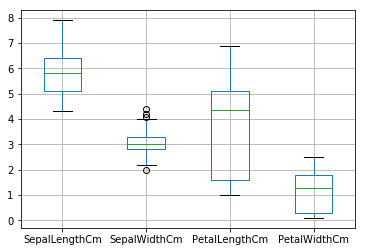

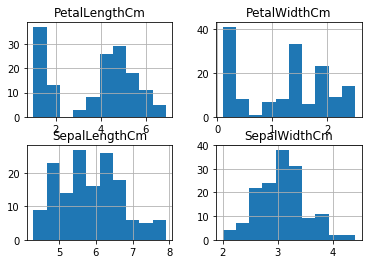

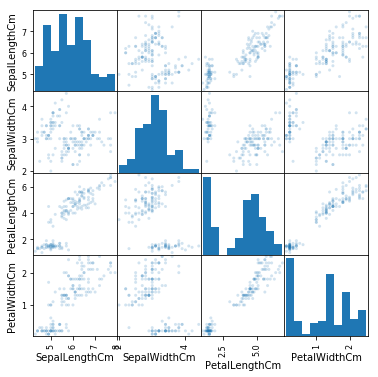

In [8]:
#Instantiating an object to store the dataset
ob=EDA(dataset)

In [14]:
#Extracting the relevant data from the attributes of the EDA class
ob.heading(dataset)
ob.fewlines
ob.corelation


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


**EXPLAINING OUR FINDINGS FOR THE 'LOADING' PART OF THE ANALYSIS.**
***
*a) What analyses we’ve done on the data:*

**Till now, we have created a basis function that loads a csv, using which we have loaded the Iris data file. In addition, we have created a function called heading that can be used to have a look at the first few rows, column names and the shape of the matrix.**

*b) Why we did these analysis:*

**It is important to understand the baselines of the dataset from the beginning. For instance, everytime we get a dataset to explore, it is necessary to perform a basic quality assurance and be aware of the number of rows and dataset.**

### 2.2 Exploring the Data
<a id="etl"></a>

**EXPLAINING OUR FINDINGS FOR THE SECTION 2.2:**
***

*a) What analyses we’ve done on the data:*

**Till now, we have inspected the dataset and created two basic functions, used for descriptive statistics and identfication of nulls and duplicates. The descriptive statistics include the mean, max, standard deviation and the the percentiles for each of the columns of the dataset.**

*b) Why we did these analysis:*

**It is necessary to perform a quality assurance on any given dataset, right from the start. If there are any nulls or duplicates that are anomalies, then it is important to inspect it and rectify them before building a model.**

### 2.3 Visualisations using pandas, seaborn
<a id="Visualise"></a>

### Summary and inference of relational plots
***

*a) What analyses we’ve done on the data:*

**We have used three different plots to bring out the statistics and relations between the different variables within the dataset.**

   **1. Boxplot: It is a visual description of the descriptive statistics we earlier used to understand the dataset.**
   
   **2. Histogram: The histograms give a very good understanding about the general distribution of the data points and present a good chance to rectif any skewness in the data.**
   
   **3. Scatter Matrix: Scatter matix gives a good understanding of the variables' interdependence.**

*b) Inference:*

   **There are a few outliers in the SepalWidth, although it has a Normal Distribution. All the other features have some sort of skenwness and can be most easily identified in the histograms for PetalLength and PetalWidth.**
   
   

In [18]:
#Visualisations using Seaborn
#Categorical Plots
def categoricalplots(df):
    figure2,axes=plt.subplots(2,2,figsize=(12,12))
    SwarmPlot_1=sns.swarmplot(x='Species',y='PetalLengthCm',
                           data=dataset,
                          ax=axes[0,0])
    SwarmPlot_2=sns.swarmplot(x='Species',y='PetalWidthCm',
                           data=dataset,
                          ax=axes[0,1])
    SwarmPlot_3=sns.swarmplot(x='Species',y='SepalWidthCm',
                           data=dataset,
                          ax=axes[1,1])
    SwarmPlot_4=sns.swarmplot(x='Species',y='SepalLengthCm',
                           data=dataset,
                          ax=axes[1,0])
    
    figure3,axes1=plt.subplots(2,2,figsize=(12,12))
    BarPlot_1=sns.barplot(x='Species',y='PetalLengthCm',
                           data=dataset,
                          ax=axes1[0,0])
    BarPlot_2=sns.barplot(x='Species',y='PetalWidthCm',
                           data=dataset,
                          ax=axes1[0,1])
    BarPlot_3=sns.barplot(x='Species',y='SepalWidthCm',
                           data=dataset,
                          ax=axes1[1,1])
    BarPlot_4=sns.barplot(x='Species',y='SepalLengthCm',
                           data=dataset,
                          ax=axes1[1,0])
    
    figure4 = sns.lmplot(x="SepalLengthCm", y="PetalLengthCm", col="Species",
                         data=dataset, aspect=1, x_jitter=.1)
    
    return figure2,figure3,figure4
    


(<matplotlib.figure.Figure at 0x25c3a398748>,
 <seaborn.axisgrid.FacetGrid at 0x25c3a584390>)

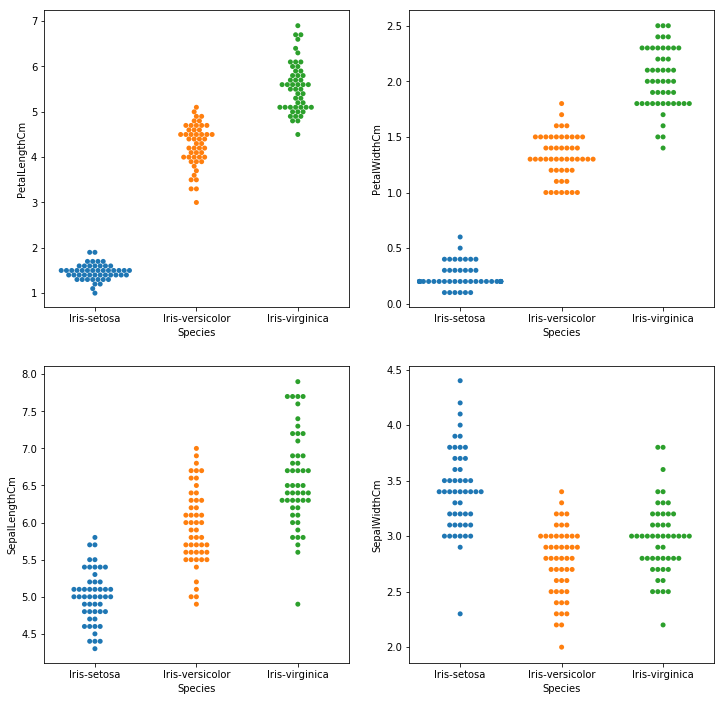

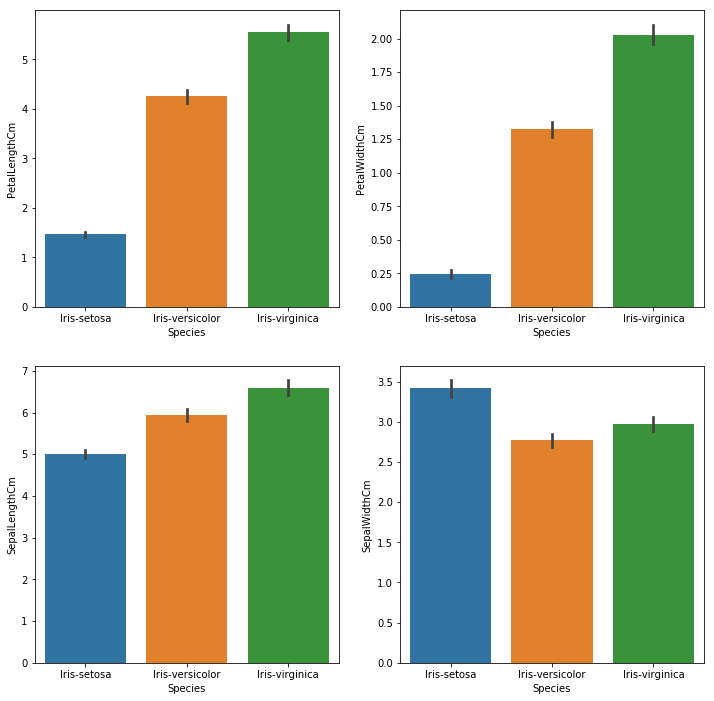

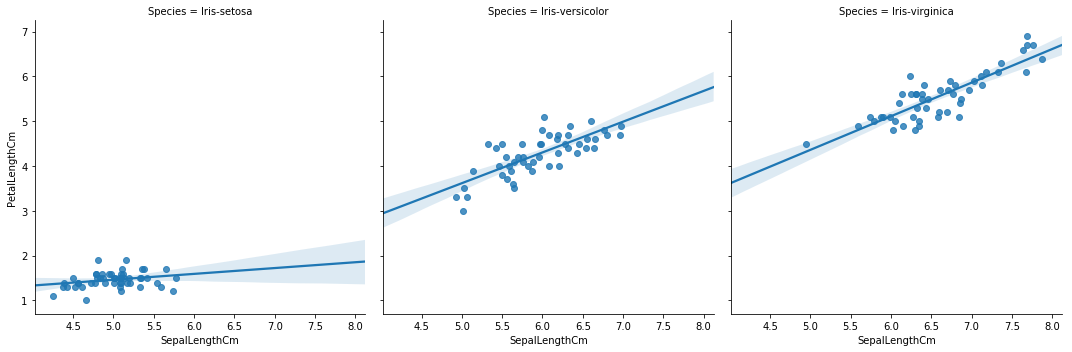

In [19]:
categoricalplots(dataset)

### Summary and inference of Categorical plots
***

*a) What kind of categorical plots and analyses we’ve done on the data:*

**We have used three different types of categorical plots to identify relationship between the flower species category and the flower variables**

**1. Violinplots: Such plots give a very good idea about the distribution of data points for a partiular category and also a very good visual explanation of mean, standard deviation and the spread of the data points.**

**2. BarPlots: Such plots essentially give similar outputs as the violinplots, but are much easier to read, much designed for a lessear technical audience.**

**3. ScatterPlots: Provide a very good way to interpret the interdependence of the variables. In addition, we can plot the best-fit lines and the confidence intervals.**

*b) Inferences:*

**Violin and Bar Plots:**

*Iris-Virginica has the highest Petallength, PetalWidth and SepalLength.Although, the spread of the datapoints across values is higher as well*

*Iris-Setosa has the smallest Petallength, PetalWidth and SepalLength, with a lot of data points aggregated around the mean. Although, Iris-Setosa has the highest recorded value for SepalWidth.*

**Scatterplots**

*Positive Correlation observed between **SepalLength, PetalLength** and **PetalWidth and Petallength**.*

*Negative Correlation observed between **SepalWidth, SepalLength** and **SepalWidth, PetalWidth**.*



### 2.4 Feature Engineering
<a id="Engineer"></a>

In [20]:
class Engineering():
    def __init__(self,df,var1,var2):
        self.data = df
        self.variable1=var1
        self.variable2=var2
        self.featuredivision(var1,var2)
        self.featuremultiplied(var1,var2)
        
    
    def featuredivision(self,var1,var2):
        """calculates ratio of given two variables"""
        self.dividedfeature=var1/var2
        
    
    def featuremultiplied(self,var1,var2):
        """calculates product of given two variables"""
        self.multipliedfeature=var1*var2
       

In [21]:
#Instantiating the object of Engineering class
ratio1=Engineering(dataset,dataset['PetalLengthCm'],dataset['PetalWidthCm'])
ratio2=Engineering(dataset,dataset['SepalLengthCm'],dataset['SepalWidthCm'])

#Using division multiplication methods from the class on the objects
ratio1.featuredivision(dataset['PetalLengthCm'],dataset['PetalWidthCm'])
ratio1.featuremultiplied(dataset['PetalLengthCm'],dataset['PetalWidthCm'])

ratio2.featuredivision(dataset['SepalLengthCm'],dataset['SepalWidthCm'])
ratio2.featuremultiplied(dataset['SepalLengthCm'],dataset['SepalWidthCm'])

#Saving the data of division and multiplication into new columns of the original dataset. 
dataset['Petalratio']=ratio1.dividedfeature
dataset['Petalproduct']=ratio1.multipliedfeature
dataset['Sepalratio']=ratio2.dividedfeature
dataset['Sepalproduct']=ratio2.multipliedfeature


In [22]:
ratio1.data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Petalratio,Petalproduct,Sepalratio,Sepalproduct
0,5.1,3.5,1.4,0.2,Iris-setosa,7.000000,0.28,1.457143,17.85
1,4.9,3.0,1.4,0.2,Iris-setosa,7.000000,0.28,1.633333,14.70
2,4.7,3.2,1.3,0.2,Iris-setosa,6.500000,0.26,1.468750,15.04
3,4.6,3.1,1.5,0.2,Iris-setosa,7.500000,0.30,1.483871,14.26
4,5.0,3.6,1.4,0.2,Iris-setosa,7.000000,0.28,1.388889,18.00
5,5.4,3.9,1.7,0.4,Iris-setosa,4.250000,0.68,1.384615,21.06
6,4.6,3.4,1.4,0.3,Iris-setosa,4.666667,0.42,1.352941,15.64
7,5.0,3.4,1.5,0.2,Iris-setosa,7.500000,0.30,1.470588,17.00
8,4.4,2.9,1.4,0.2,Iris-setosa,7.000000,0.28,1.517241,12.76
9,4.9,3.1,1.5,0.1,Iris-setosa,15.000000,0.15,1.580645,15.19


### 2.5 Preprocessing dataset for model creation
<a id="preprocess"></a>

#### 2.5.1 Creation of dummy variables
<a id="dummies"></a>

In [57]:
#Converting the final target into binary target(0,1)
""""species={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':1}
dataset=dataset.replace({'Species':species})""""

In [27]:
class Preprocess():
    def __init__(self,df):
        self.data=df
        self.seperatedata(df)
        
        
    def seperatedata(self,df):
        self.target=df.iloc[:,4]
        self.features=df.iloc[:,lambda df:[0,1,2,3,5,6,7,8]]
           

In [28]:
#Instantiating an object of Preprocess class
pr=Preprocess(dataset)

In [32]:
#Inspecting the data in the attributes of the Preprocess class
target_variable=pr.target
data_features=pr.features

In [35]:
def labelencoded(df):
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    variable_1 = encoder.fit_transform(df) 
    encoded_dataframe=pd.DataFrame(variable_1)
    return encoded_dataframe
    

In [37]:
final_target_variable=labelencoded(target_variable)

### Summary of Feature Engineering
***

*a) What kind of Feature Engineering and analyses we’ve done on the data:*

**We have used three different types of feature engneering strategies to identify relationship between the flower variables**

**1. Division of Lengths and Widths: Essentially this engineered feature will provide an understanding about the aspect ratio of the flowers. We try to answer: Is there a relation between aspect ratio and flower species?**

**2. Multiplication of lengths and widths: Again, the key idea here is to get a sense of how the multiplied dimensions correlate to the flower species.**

**3. Labelencoding: Labelencoded the Target variable (Flower species), before we input the data into a machine learning algorithm.**



### 3: DEVELOP
<a id="BaselineModel"></a>

### 3.1 Model Development
<a id="development"></a>

### 3.1.1 Baseline Model
<a id="baseline"></a>

In [38]:
# Define train and test variables
data_features_train, data_features_test, final_target_variable_train, final_target_variable_test = train_test_split(data_features,final_target_variable,test_size=0.20, random_state=123)
  

In [77]:
class Modelling():
    def __init__(self,var1,var2):
        self.X=var1
        self.Y=var2
        self.baselinemodel(var1,var2)
        self.forest(var1,var2)
        self.boosting(var1,var2)
        self.neighbours(var1,var2)
        self.vectors(var1,var2)
        
    def baselinemodel(self,var1,var2):
        self.model=LogisticRegression()
        self.model_1=self.model.fit(var1,var2)
        
    def forest(self,var1,var2):
        self.model=RandomForestClassifier()
        self.model_2=self.model.fit(var1,var2)
        
    def boosting(self,var1,var2):
        self.model=GradientBoostingClassifier()
        self.model_3=self.model.fit(var1,var2)
        
    def neighbours(self,var1,var2):
        self.model=KNeighborsClassifier(n_neighbors = 7)
        self.model_4=self.model.fit(var1,var2)
        
    def vectors(self,var1,var2):
        self.model=SVC(kernel = 'linear', C = 1)
        self.model_5=self.model.fit(var1,var2)

In [78]:
mod=Modelling(data_features_train,final_target_variable_train)

C:\Users\ishan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\ishan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ishan\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [85]:
mod1=mod.model_1
mod2=mod.model_2
mod3=mod.model_3
mod4=mod.model_4
mod5=mod.model_5

In [100]:
list_of_models=[mod1,mod2,mod3,mod4,mod5]

### Classification Report (Precision/Recall)
***
- **Precision**: Focuses on your predictions. It is measuring what fraction of your predictions for the positive class are valid. It is formulated by (TP/TP+FP).
- **Recall**: Focuses on all of the possible positive classes. It's telling you how often your predictions actually capture the positive class. It is formulated by (TP/TP+FN).
- **F1-Score**: Tells you the accuracy of the classifier in classifying the data points in that particular class compared to all other class. It is calculated by taking the harmonic mean of precision and recall.
- **Support**: The support is the number of samples of the true response that lies in that class.

- https://medium.com/swlh/recall-precision-f1-roc-auc-and-everything-542aedf322b9

# Recall or Precision?
***
It depends on how much cost/weight you want on your two types of errors: (1) **False Positives** or (2) **False Negatives**

What's the coset of having a FN and FP?


**Optimize Recall When:**
- You want to limit **false negatives**
- You will get more False Positives
- FN > FP
- Example: Predicting Cancer Patients or Credit Card Fraud

**Optimize Precision When:**
- You want to limit **false positives**
- FP > FN
- Example: Spam VS Not Spam

### Summary of Baseline Model: Logistic Regression
***

*a) What kind of Feature Engineering and analyses we’ve done on the data:*

**We have used three different types of feature engneering strategies to identify relationship between the flower variables**

**1. Division of Lengths and Widths: Essentially this engineered feature will provide an understanding about the aspect ratio of the flowers. We try to answer: Is there a relation between aspect ratio and flower species?**

**2. Multiplication of lengths and widths: Again, the key idea here is to get a sense of how the multiplied dimensions correlate to the flower species.**

**3. Labelencoding: Labelencoded the Target variable (Flower species), before we input the data into a machine learning algorithm.**

### 3.2 ModelTuning
<a id="tuning"></a>

### 3.3 ModelEvaluation
<a id="evaluate"></a>

In [109]:
class Eval():
    def __init__(self,v1,v2,v3):
        self.X_test=v1
        self.Y_test=v2
        self.model=v3
        self.pred(v1,v3)
        self.report(v1,v2,v3)
        
    def pred(self,v1,v3):
        self.predicted_value=v3.predict(v1)
    
    def report(self,v1,v2,v3):
        print(metrics.classification_report(v2,v3.predict(v1)))
        

In [122]:
eval1=Eval(data_features_test,final_target_variable_test,mod1)
eval2=Eval(data_features_test,final_target_variable_test,mod2)
eval3=Eval(data_features_test,final_target_variable_test,mod3)
eval4=Eval(data_features_test,final_target_variable_test,mod4)
eval5=Eval(data_features_test,final_target_variable_test,mod5)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.86      1.00      0.92         6
          2       1.00      0.91      0.95        11

avg / total       0.97      0.97      0.97        30

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.86      1.00      0.92         6
          2       1.00      0.91      0.95        11

avg / total       0.97      0.97      0.97        30

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       1.00      1.00      1.00         6
          2       1.00      1.00      1.00        11

avg / total       1.00      1.00      1.00        30

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        13
          1       0.86      1.00      0.92         6
          2       1.00      0.91    

### 4: DEPLOY
<a id="deploy"></a>

In [126]:
def saveresults(v):
    df=pd.DataFrame(v)
    df.to_csv('C:/Users/ishan/Documents/Python Scripts/DSDJ/3rd Portfolio Project/iris-species/Final/Predicted_Values.csv')

In [128]:
saveresults(eval1.predicted_value)